# COMPUTATIONAL COSMOLOGY
---
This project has been developed for the course Cosmology within the Master’s Degree in Physics at the University of Valencia. Its objective is to demonstrate the use of standard scientific libraries together with specialized astrophysical libraries in computational cosmology. The project applies numerical and data analysis techniques commonly used in modern cosmological research. It illustrates how these tools can be integrated to model cosmological scenarios and analyze data.

### Authors
- Alejandro Estellés Roig (aesroig@alumni.uv.es)
- Juan Ramón Díaz Santos (diazjuan@alumni.uv.es)


# CAMB. Cosmological Models
---


| Parameter       | Meaning                                                | Typical value (Planck 2018) | Physical description                                                                                                                                 |
| --------------- | ------------------------------------------------------ | --------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| $H_0$           | Hubble constant today, in km/s/Mpc                     | 67.4                        | Determines the **current expansion rate** of the Universe. Controls angular distances and cosmic ages.                                               |
| $\Omega_b, h^2$ | Physical baryon density                                | 0.0224                      | Sets the amount of **baryonic matter** (atoms). Influences the height of the CMB acoustic peaks.                                                     |
| $\Omega_c, h^2$ | Physical cold dark matter density                      | 0.119                       | Controls the **amount of cold dark matter (CDM)**. Modifies the amplitude and position of peaks and the growth of structure.                         |
| $\Omega_k$      | Spatial curvature ($\Omega_k = 1 - \Omega_\text{tot}$) | 0.0                         | Zero means a **flat Universe**. Nonzero values change CMB geometry and comoving distances.                                                           |
| $\tau$          | Optical depth to reionization                          | 0.056                       | Describes how much CMB light was **rescattered by free electrons** after reionization. Affects the low-$\ell$ polarization spectrum ($C_\ell^{EE}$). |

| Parameter              | Meaning                                              | Physical description                                                                                                 |
| ---------------------- | ---------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| $m_\nu$                | Total sum of neutrino masses (eV)                    | Determines how neutrinos suppress power on small scales (due to their thermal velocities). Example: $m_\nu=0.06$ eV. |
| $n_\nu$                | Effective total number of neutrino species           | Usually $N_\text{eff}=3.046$ (if >3, implies extra radiation, such as sterile neutrinos or dark-sector fields).      |
| $Y_{He}$               | Primordial helium fraction                           | Controls the timing of recombination; typically $\sim 0.245$.                                                        |
| $m_{effsterile}$       | Effective sterile neutrino mass (if $n_\nu > 3.046$) | Allows inclusion of exotic species.                                                                                  |
| standard_neutrino_neff | Baseline value of standard $N_\text{eff}$            | 3.046 (normally kept fixed).                                                                                         |


| Parameter       | Mainly affects       | Observable effect                                                                        |
| --------------- | -------------------- | ---------------------------------------------------------------------------------------- |
| $H_0$           | Angular distances    | Shifts the position of the peaks in $C_\ell^{TT}$.                                       |
| $\Omega_b, h^2$ | Baryon density       | Changes the **relative height** of the acoustic peaks (more baryons → higher odd peaks). |
| $\Omega_c, h^2$ | Dark matter          | Modifies the **growth of perturbations** and the overall height of the peaks.            |
| $\tau$          | Reionization         | Suppresses $C_\ell^{TT}$ at low $\ell$ and enhances $C_\ell^{EE}$ at low $\ell$.         |
| $m_\nu$         | Massive neutrinos    | Suppresses $P(k)$ on small scales (free-streaming effect).                               |
| $n_\nu$         | Additional radiation | Shifts the peaks due to changes in the early expansion rate.                             |



## 0. Libraries and System Configuration

### 0.1. CAMB Library
---

**CAMB (Code for Anisotropies in the Microwave Background)** 

is a widely used Boltzmann solver in cosmology that computes the evolution of linear perturbations in the Universe and predicts observable quantities such as the Cosmic Microwave Background (CMB) anisotropies and the matter power spectrum. 

It is designed to model cosmological scenarios within and beyond the standard ΛCDM framework, incorporating effects from dark matter, dark energy, neutrinos, and primordial fluctuations. CAMB is highly optimized, well-tested against observations (e.g., Planck), and commonly used in parameter estimation pipelines together with MCMC samplers, making it a core tool for modern precision cosmology.

**CAMB options:**

* Compute CMB angular power spectra ( $C_\ell^{TT}$, $C_\ell^{TE}$, $C_\ell^{EE}$, $C_\ell^{BB}$ ).
* Compute the matter power spectrum ( $P(k)$ ) and transfer functions.
* Include massive neutrinos and vary ( $N_{\text{eff}}$ ).
* Model dark energy (constant ( $w$ ), time-dependent ( $w(a)$ )).
* Study effects of spatial curvature ( $\Omega_k$ ).
* Generate lensing potential and lensed CMB spectra.
* Explore non-standard cosmologies (early dark energy, modified parameters).
* Interface with MCMC codes (e.g., CosmoMC) for parameter inference.
* Compare theoretical predictions with observational data (Planck, BAO, LSS).
* Export spectra and background quantities for further analysis or simulations.


In [1]:
import camb
from camb import model, initialpower
import matplotlib.pyplot as plt
import numpy as np


## 1. Cosmological and System parameters
---

In [2]:
# ================================
# 1. Base cosmological parameters
# ================================
pars = camb.CAMBparams()

# Reference cosmology (Planck 2018)
pars.set_cosmology(H0=67.4, ombh2=0.0224, omch2=0.119, tau=0.056)
# --- ENABLE TENSOR MODE ---
pars.WantTensors = True  # <==== IMPORTANT
pars.InitPower.set_params(As=2.1e-9, ns=0.965, r=0.01)

# ================================
# 2. Configure calculations to perform
# ================================
pars.set_for_lmax(2500, lens_potential_accuracy=1)


class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = True
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_lens
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2650
 max_l_tensor = 600
 max_eta_k = 18000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.119
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nrun 

## 2. CAMB
---

In [3]:
# ================================
# 3. Ejecutar CAMB
# ================================
results = camb.get_results(pars)

# ================================
# 4. Obtener espectros C_l
# ================================
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ell = np.arange(totCL.shape[0])
print(np.max(totCL))


5740.534319481083


## 3. CMB Spectrum
---

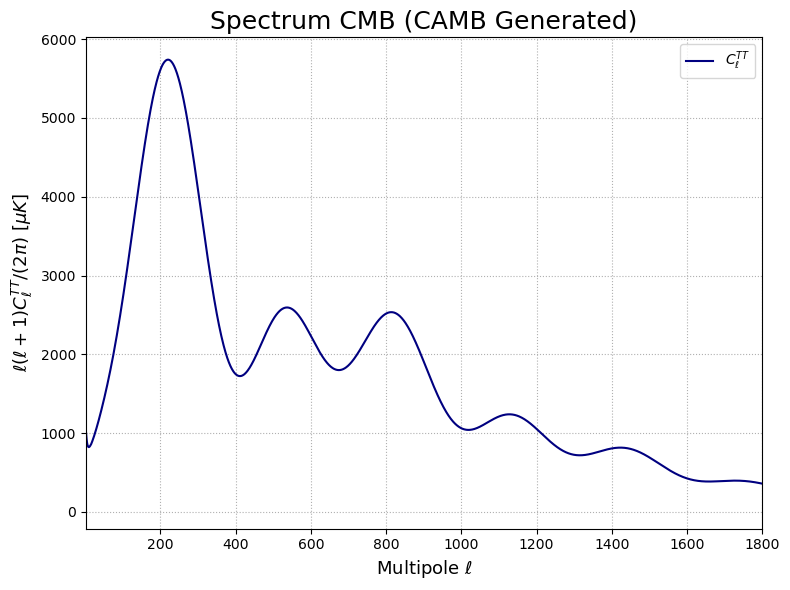

In [10]:
# ================================
# 5. Graficar C_l^{TT}
# ================================
plt.figure(figsize=(8,6))
plt.plot(ell[2:], totCL[2:,0], color='navy', label=r'$C_\ell^{TT}$')
plt.xlabel(r'Multipole $\ell$', fontsize=13)
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)\ [\mu K]$', fontsize=13)
plt.title('Spectrum CMB (CAMB Generated)', fontsize=18)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlim(2, 1800)
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


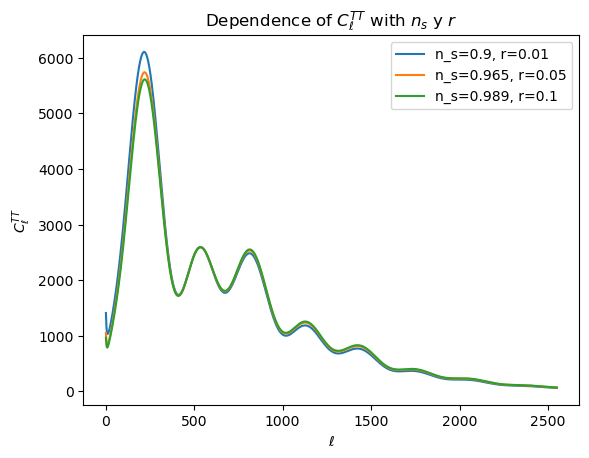

In [11]:
for ns, r in [(0.9,0.01),(0.965,0.05),(0.989,0.10)]:
    pars.InitPower.set_params(As=2.1e-9, ns=ns, r=r)
    results = camb.get_results(pars)
    cl = results.get_cmb_power_spectra(pars, CMB_unit='muK')['total'][:,0]
    #plt.loglog(ell[2:], cl[2:], label=f'n_s={ns}, r={r}')
    plt.plot(ell[2:], cl[2:], label=f'n_s={ns}, r={r}')
plt.legend()
plt.xlabel(r'$\ell$'); plt.ylabel(r'$C_\ell^{TT}$')
plt.title('Dependence of $C_\ell^{TT}$ with $n_s$ y $r$')
plt.show()

## 4. Power Spectrum
---

In [6]:
# Redefinir rango de escalas (Mpc^-1)
k = np.logspace(-4, 1, 200)
PK = camb.get_matter_power_interpolator(pars, nonlinear=False, hubble_units=False)
pk = [PK.P(0, kval) for kval in k]  # z=0, sin argumentos nombrados


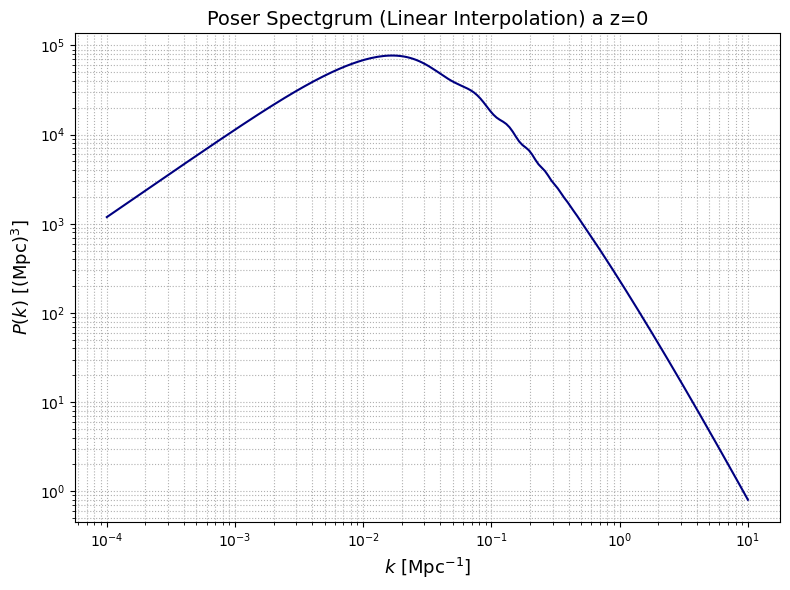

In [12]:
# Redefinir rango de escalas (Mpc^-1)
k = np.logspace(-4, 1, 200)
PK = camb.get_matter_power_interpolator(pars, nonlinear=False, hubble_units=False)
pk = [PK.P(0, kval) for kval in k]  # z=0, sin argumentos nombrados

# ================================
# 4. Graficar P(k)
# ================================
plt.figure(figsize=(8,6))
plt.loglog(k, pk, color='navy')
plt.xlabel(r'$k\ [\mathrm{Mpc}^{-1}]$', fontsize=13)
plt.ylabel(r'$P(k)\ [(\mathrm{Mpc})^3]$', fontsize=13)
plt.title('Poser Spectgrum (Linear Interpolation) a z=0', fontsize=14)
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


## 5. Variables and Observables
---

### **Key – Meaning – Typical value**

- `rstar` Sound horizon radius at recombination (Mpc) ~144 Mpc

- `zstar` Redshift of last scattering ~1090

- `thetastar` Angular size of the sound horizon at recombination ~1.04×10⁻²

- `age` Age of the Universe (Gyr) ~13.8 Gyr

- `zdrag` Redshift of baryon decoupling (drag epoch) ~1059

- `rdrag` BAO scale (Mpc) ~147 Mpc


In [13]:
# Angular Distance to the last scattering
DA = results.angular_diameter_distance(1090)
# Sound Horizont
rs = results.get_derived_params()['rstar']
# Cosmological Constants 
params = results.get_derived_params()
for key, value in params.items():
    print(f'{key}: {value:.3f}')


age: 13.820
zstar: 1089.813
rstar: 144.676
thetastar: 1.040
DAstar: 13.909
zdrag: 1059.945
rdrag: 147.333
kd: 0.141
thetad: 0.161
zeq: 3379.689
keq: 0.010
thetaeq: 0.817
thetarseq: 0.451


# License and Terms of Use
---
This code is distributed under the terms of the GNU General Public License (GPL).
You are free to use, modify, and redistribute it, provided that any derivative work is released under the same license and that proper credit is given to the original author.
The code is provided “as is”, without any warranty of any kind, express or implied.